In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial

In [2]:
class KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter

    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        labels = np.ones_like(X[:, 0])
        for i in range(X.shape[0]): # для каждой точки массива
            labels[i] = KMeans.closest(self, X[i, :], self.centers) # находим ближайший кластер
        return labels
    
    @staticmethod
    def distance(self, vector1, vector2):
        '''
        Определяем функцию расстояния
        '''
        # euclidean, cityblock, chebyshev, ...
        return scipy.spatial.distance.cdist(np.array(vector1).reshape(1,-1), np.array(vector2).reshape(1,-1), self.metric)[0][0]

    @staticmethod
    def closest(self, vector, centers):
        '''
        находим ближайший центр к данному вектору
        '''
        res = 0
        for i in range(len(centers)):
            if KMeans.distance(self, vector, centers[i]) < KMeans.distance(self, vector, centers[res]):
                res = i
        return res 
    
    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        centers = []
        # X.shape[0] - размер выборки
        # X.shape[1] - число признаков
        for cluster in range(self.n_clusters):
            centers.append(np.array([np.random.uniform(X[:, i].min(), X[:, i].max()) for i in range(X.shape[1])]))
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        old_labels = np.ones_like(X[:, 0])
        new_labels = np.ones_like(X[:, 0])
        for step in range(self.max_iter):
            old_labels = new_labels
            for i in range(X.shape[0]): # для каждой точки выборки
                new_labels[i] = KMeans.closest(self, X[i, :], centers) # находим ближайший кластер
            
            '''
            Уточняеням положения центров кластеров
            '''
            for i in range(self.n_clusters):
                s_i = 0
                centers[i] = np.zeros_like(X[0, :])
                for j in range(len(new_labels)):
                    if new_labels[j] == i:
                        centers[i] += X[j, :]
                        s_i += 1
                centers[i] = centers[i] / s_i
            if np.array_equal(old_labels, new_labels):
                break
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        self.centers = centers

In [3]:
datasets_num = 3
df = []
for i in range(datasets_num):
    df.append(pd.read_csv('./dataset'+str(i + 1)+'.csv', sep='\t', header=None))
    clusters = np.zeros_like(df[i][0].values)
    df[i]['cluster'] = clusters

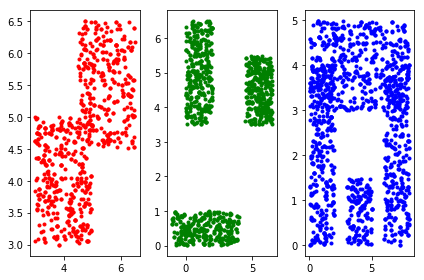

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ax1, ax2, ax3 = axes.flatten()
ax1.plot(df[0][0], df[0][1].values, '.', color='r')
ax2.plot(df[1][0], df[1][1].values, '.', color='g')
ax3.plot(df[2][0], df[2][1].values, '.', color='b')
fig.tight_layout()
plt.show()

In [7]:
kmeans = []
for i in range(datasets_num):
    kmeans.append(KMeans(n_clusters=3, max_iter=500, metric='chebyshev'))
    kmeans[i].fit(df[i][[0, 1]].values)

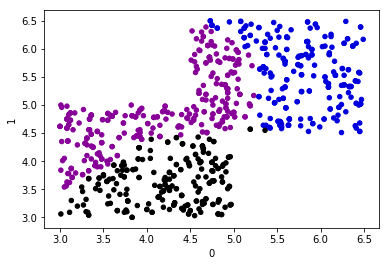

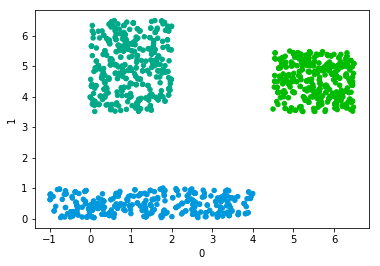

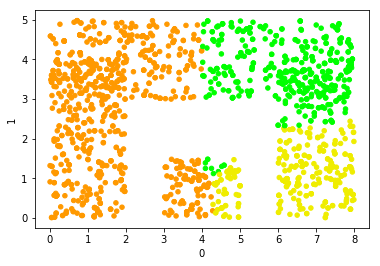

In [8]:
for i in range(datasets_num):
    df[i].plot.scatter(x=0, y=1, c=[matplotlib.cm.spectral(float(j + 3*i) /10) for j in kmeans[i].predict(df[i][[0, 1]].values)])
plt.show()